# 01. Introduccion a ```pvpython```

Este cuaderno es una introducción a ```pvpython```. Se presentan comandos básicos para controlar el software desde el Python Shell.

Hay que tener en cuenta que la librería ```paraview.simple``` [solo es ejecutable desde la interfaz de ```pvpython```](https://www.paraview.org/Wiki/ParaView:pvpython#Getting_Started), siendo esta la que cuenta con el interprete necesario, es un formalismo que se escriba aquí ya que se carga automáticamente al iniciar el Python Shell desde paraview.

Todos los comandos son obtenidos del manual [ParaViewGuide-8.5.1](https://www.paraview.org/paraview-guide/) y adaptados en determinados casos.

In [ ]:
# La libreria.
from paraview.simple import *

### Creando fuentes (*sources*)

Para crear una fuente en ```pvpython``` basta con escribirlas a manera de método como su nombre en inglés, comenzando por mayúscula; por ejemplo, para crear una esfera:


In [ ]:
Sphere()

# Los reemplazos del botón Apply.
Show()          # La define como fuente activa.
Render()        # Actualiza propiedades de renderización.

```Show()``` y ```Render()``` hacen las veces de Apply, es decir que cuando se modifiquen propiedades de los módulos se deberán ejecutar. 

### Modificando propiedades.

Las propiedades son diferentes en cada fuente, sin embargo, la forma de acceder a ellas es la misma, mediante los comandos:

+  ```SetProperties(key = valor)``` 
+  ```GetProperty('key')```
 


In [ ]:
# Para cambiar sus propiedades (OJO: se aplica a la fuente activa)
SetProperties(Radius = 1.0)

# y de forma múltiple también.
SetProperties(Center = [1, 0, 0], ThetaResolution = 100)

# Podemos obtener las propiedades que queremos conocer:
GetProperty('Radius')
GetProperty('Center') 

Las propiedades de visualización también son modificables, mediante los comandos ```SetDisplayProperties()``` y ```GetDisplayProperty()```

In [ ]:
SetDisplayProperties(Opacity = 0.5)
GetDisplayProperty('Opacity')

### Aplicando filtros (*Filters*)

Los filtros, al igual que las fuentes, se llaman mediante su nombre en inglés como un método, y al ser módulos igualmente se abren como módulos activos. 

In [ ]:
# Aplciando por ejemplo el filtro shrink.
Shrink()            # Al llamar al filtro de esta forma se activará sobre la 
                    # fuente activa.
Show()
Render()

El filtro se ha convertido en el módulo activo ahora, para moverse entre 
fuentes debemos conocer el "input" o entrada de cada una.

Recordemos que el filtro recibió información en su entrada de datos (input port), estos datos son la información de la esfera, entonces si conocemos la instancia de los datos de entrada podremos ocultar la esfera o en otras circunstancias, moverse entre módulos del pipeline.

En el [ParaViewGuide-8.5.1](https://www.paraview.org/paraview-guide/) se emplea la siguiente rutina:

In [ ]:
entrada_filtro = GetProperty('Input')      

# y se puede ocultar la esfera.
Hide(entrada_filtro)

# Se debe actualizar la vista.
Render()    

La forma de obtener la instancia de la entrada del filtro en la ```línea 1```` **ES INCORRECTA** y arrojará el siguiente error:

```AttributeError: 'paraview.modules.vtkRemotingServerManager.vtkSMInp' object has no attribute 'Port'```

Según el [foro de ParaView](https://discourse.paraview.org/t/attributeerror-vtkpvservermanagercorepython-vtksminputproperty-object-has-no-attribute-port/3004) Lo correcto es obtener la instancia de la entrada de datos como se muestra a continuación:



In [ ]:

# Definir el filtro como un objeto.
filtro = Shrink()

Show()      # Se vuelve activo.
Render()    # Se renderiza.

# Se busca la instancia de la entrada de datos del filtro con el método 
# .Input
entrada_filtro = filtro.Input

# Se oculta la fuente de la esfera.
Hide(entrada_filtro)

Render()    # Se renderiza.

La secuencia anterior se simplifica con el entendimiento de la programación orienteada a objetos en las celdas siguientes. Otra manera, sería mediante los comandos ```GetActiveSource()``` y ```SetActiveSource()```; si se fijan, la sintaxis de los comandos es muy intuitiva en el idioma inglés, y su estructura se repite entre ellos.


In [ ]:
instancia_filtro = GetActiveSource()
instancia_esfera = filtro.Input         # La instancia de la esfera es la misma 
                                        # instancia de la entrada del filtro.

# Ahora, pondremos la esfera como la fuente activa.
SetActiveSource(instancia_esfera)       # En el pipeline, se resalta el módulo 
                                        # de la esfera.
Hide()                                  # Escondemos la esfera.

# Restaura el filtro shrink como la fuente activa.
SetActiveSource(instancia_filtro)

# Se vuelve a renderizar.
Render()

### Sintaxis de la programación orientada a objetos.

Ya que todo lo anterior es lenguaje Python, podemos codificar las fuentes como objetos, de esta manera la creación de una esfera sería de la siguiente forma:


In [ ]:
# Se crea y modifica la esfera.
esfera = Sphere()
esfera.Radius = 1.0
esfera.ThetaResolution = 100

# Se crea y configura la vista.
esfera_en_pantalla = Show(esfera)
vista = Render()
esfera_en_pantalla.Opacity = 0.5

# Se aplica el filtro.
filtro = Shrink(Input = esfera, ShrinkFactor = 0.4)

# Se oculta la esfera.
Hide(esfera)
filtro_en_pantalla = Show(filtro)
Render()

### Actualizando el Pipeline

Sin modificar la vista ni hacer renderizado también es posible actualizar el módulo respecto a modificaciones que se la hagan en las propiedades, o en general, actualizar el pipeline.

Por ejemplo, una propiedad es el espacio que ocupa un elemento, y podemos usar esta información para aprender el comando ```UpdatePipeline()```. Si creamos un cilindro, los límites deberán ser los que sus dimensiones por defecto generen, así que al modificar las dimensiones **y actualizar el pipeline** se debería ver en consola los cambios.

Se recomienda ejecutar línea a línea este código para ver de lo que se habla.


In [ ]:
cilindro = Cylinder()

# Se imprimen los límites "producidos" por el cilindro, aunque en realidad no se 
# haya producido datos hasta el momento.
cilindro.GetDataInformation().GetBounds()

# Se actualiza el pipeline, explícitamente la fuente activa.
UpdatePipeline()

# De forma alternativa, se puede actualizar especificando la fuente.
UpdatePipeline(proxy = cilindro)

# Chequeando los límites otra vez veremos los verdaderos:
cilindro.GetDataInformation().GetBounds()

# Si volvemos a actualizar el pipeline, no deberán haber modificaciones en estos
# limites, ya que no han habido modificaciones en la fuente.
UpdatePipeline()
cilindro.GetDataInformation().GetBounds()

# Si cambiamos una propiedad, y miramos los límites, no van a cambiar ya que no 
# hemos actualizado el pipeline.
cilindro.Radius = 5
cilindro.GetDataInformation().GetBounds()

UpdatePipeline()
cilindro.GetDataInformation().GetBounds()

## Comentarios finales.

Lo que se vio en este cuaderno fueron comandos para introducir en el Python Shell; sin embargo, usted puede crear un archvios ```.py``` con una secuencia de acciones completa y abrirla directamente en el Python Shell presionando el botón ```Run Script```.

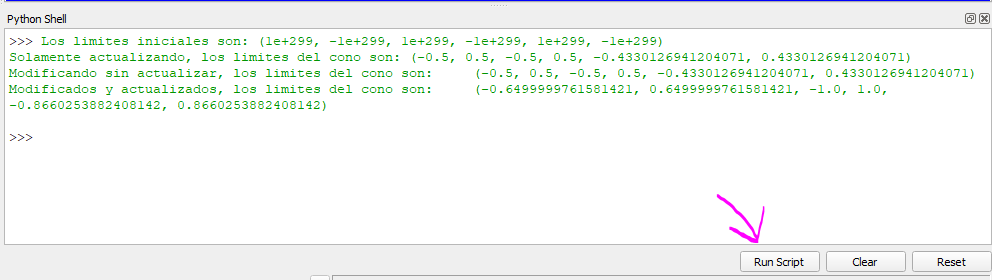

Tenga en cuenta que: si de la orden de imprimir una cadena de texto introducida por usted para acompañar algún valor, no escriba tildes, ya que obtendrá un error como estos:

```SyntaxError: (unicode error) 'utf-8' codec can't decode byte 0xed in position 5: invalid continuation byte```